<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-libraries" data-toc-modified-id="Load-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load libraries</a></span></li><li><span><a href="#Prepare-the-dataset" data-toc-modified-id="Prepare-the-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prepare the dataset</a></span></li></ul></div>

# Load libraries

In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Prepare the dataset

In [2]:
import pickle

data_dir = "./data/"
with open(data_dir + "speaker_audio_segments_dict.pkl", 'rb') as f:
    student_audio_segments_dict = pickle.load(f)

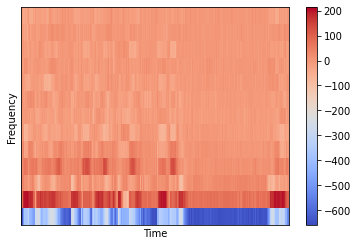

In [3]:
DEFAULT_SAMPLING_RATE = 22050
FRAME_SIZE = 512
HOP_LENGTH = 256

def extract_mfcc(sample):
    MFCCs = librosa.feature.mfcc(sample, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, n_mfcc=13)
    return MFCCs.T

sample = np.load(data_dir + "waveform/18020050_NguyenMinhTan/07/0.npy")
mfccs = extract_mfcc(sample)
librosa.display.specshow(mfccs.T, sr=DEFAULT_SAMPLING_RATE, hop_length=HOP_LENGTH)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()

In [20]:
import _pickle as cPickle

MFCC_LEN_LIM = 700

waveform_dir = data_dir + "waveform/"

def create_mfcc_data(student_id, article_id, sentence_id):
    audio_sentence = np.load(waveform_dir + student_id + "/{:02d}/".format(article_id + 1) + str(sentence_id) + ".npy")
    mfccs = extract_mfcc(audio_sentence)
    if len(mfccs) < MFCC_LEN_LIM:
        padded_mfccs = np.zeros((MFCC_LEN_LIM, mfccs.shape[1]), dtype=np.float32)
        padded_mfccs[-mfccs.shape[0]:] = mfccs
        return padded_mfccs
    return mfccs[:MFCC_LEN_LIM]

data_mfcc = {}
for student_id in student_audio_segments_dict:
    print(student_id, end=": ")
    student_mfccs = []
    for article_id in range(len(student_audio_segments_dict[student_id])):
        article_mfccs = []
        for sentence_id in range(len(student_audio_segments_dict[student_id][article_id])):
            if student_audio_segments_dict[student_id][article_id][sentence_id] == (None, None):
                article_mfccs.append(None)
            else:
                article_mfccs.append(create_mfcc_data(student_id, article_id, sentence_id))
        student_mfccs.append(article_mfccs)
        print('=', end='')
    data_mfcc[student_id] = student_mfccs
    print('')

cPickle.dump(data_mfcc, open(data_dir + "dataset/data_mfcc_for_generator.pkl", 'wb'), protocol=2)

17021214_TranVanCuong: ==========
17021218_DoanDinhDung: ==========
17021219_HaAnhDung: ==========
17021220_HoangNgocDung: ==========
17021229_VuTrongDuong: ==========
17021242_PhamTuanHiep: ==========
17021257_NguyenVietHoang: ==========
17021275_VuQuocKhanh: ==========
17021283_DangNhatLinh: ==========
17021284_LuuHoaiLinh: ==========
17021296_MacDinhMinh: ==========
17021297_NguyenDinhMinh: ==========
17021300_NguyenNgocMinh: ==========
17021304_NguyenNam: ==========
17021308_PhamHoangNam: ==========
17021312_PhamDacNgocNhat: ==========
17021313_DinhCongPhan: ==========
17021314_NguyenNgocPhong: ==========
17021321_TranThuPhuong: ==========
17021324_NguyenHongQuan: ==========
17021325_NguyenMinhQuan: ==========
17021326_NguyenTuanQuoc: ==========
17021330_PhamThaiSon: ==========
17021338_LeVanThinh: ==========
17021340_ThieuMinhThinh: ==========
17021342_NhuAnhThu: ==========
17021343_NguyenVuongTien: ==========
17021354_NguyenSiTung: ==========
17021357_TranQuangVinh: ==========
18